## How can the company improve collaboration?


The notebook below maps out the employee networks and tries to esterblish the inter-departmental collaboration within the company. 
Ultimately, the goal is to improve employee collaboration within the organisation.

The notebook shall answer the following questions

1. Which departments are the most/least active?
2. Which employee has the most connections?
3. Which employee has the most connections?
4. Using the network analysis, in which departments would you recommend the HR team focus to boost collaboration?

In [211]:
#install packages
!pip install networkx

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx #graph

In [2]:
#Read data into a dataframe
messages = pd.read_csv('data/messages.csv', parse_dates= ['timestamp'])
employees = pd.read_csv('data/employees.csv')

In [3]:
#display first five rows
employees.head()

,id,department,location,age
0,3,Operations,US,33
1,6,Sales,UK,50
2,8,IT,Brasil,54
3,9,Admin,UK,32
4,12,Operations,Brasil,51


In [4]:
#display first five rows
messages.head()

,sender,receiver,timestamp,message_length
0,79,48,2021-06-02 05:41:34,88
1,79,63,2021-06-02 05:42:15,72
2,79,58,2021-06-02 05:44:24,86
3,79,70,2021-06-02 05:49:07,26
4,79,109,2021-06-02 19:51:47,73


In [5]:
# merge messages dataframe to employees dataframe id dataframe

df = pd.merge(messages, employees , left_on='sender',right_on='id' )
df.head()

,sender,receiver,timestamp,message_length,id,department,location,age
0,79,48,2021-06-02 05:41:34,88,79,Sales,France,33
1,79,63,2021-06-02 05:42:15,72,79,Sales,France,33
2,79,58,2021-06-02 05:44:24,86,79,Sales,France,33
3,79,70,2021-06-02 05:49:07,26,79,Sales,France,33
4,79,109,2021-06-02 19:51:47,73,79,Sales,France,33


In [6]:
#summary stats
df.describe(include='all')

C:\Users\Admin\AppData\Local\Temp\ipykernel_36676\2470175631.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,sender,receiver,timestamp,message_length,id,department,location,age
count,3512.000000,3512.000000,3512,3512.000000,3512.000000,3512,3512,3512.000000
unique,NaN,NaN,3398,NaN,NaN,6,5,NaN
top,NaN,NaN,2021-11-29 07:37:49,NaN,NaN,Sales,US,NaN
freq,NaN,NaN,2,NaN,NaN,1551,1516,NaN
first,NaN,NaN,2021-06-02 05:41:34,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2021-11-29 07:37:49,NaN,NaN,NaN,NaN,NaN
mean,591.953303,627.052677,NaN,48.450740,591.953303,NaN,NaN,38.948462
std,397.953749,460.981865,NaN,22.857461,397.953749,NaN,NaN,8.348055
min,79.000000,3.000000,NaN,10.000000,79.000000,NaN,NaN,23.000000
25%,332.000000,277.000000,NaN,29.000000,332.000000,NaN,NaN,31.000000


In [7]:
#check for missing Data
df.isnull().sum()

sender            0
receiver          0
timestamp         0
message_length    0
id                0
department        0
location          0
age               0
dtype: int64

### Which employee has the most connections?

In the current analysis, we use Network analysis to model the connections between employees of the company, after esterblish which
employee has the most connections

In [8]:
#create graph
G = nx.from_pandas_edgelist(df,source='sender',target='receiver',edge_attr='message_length')

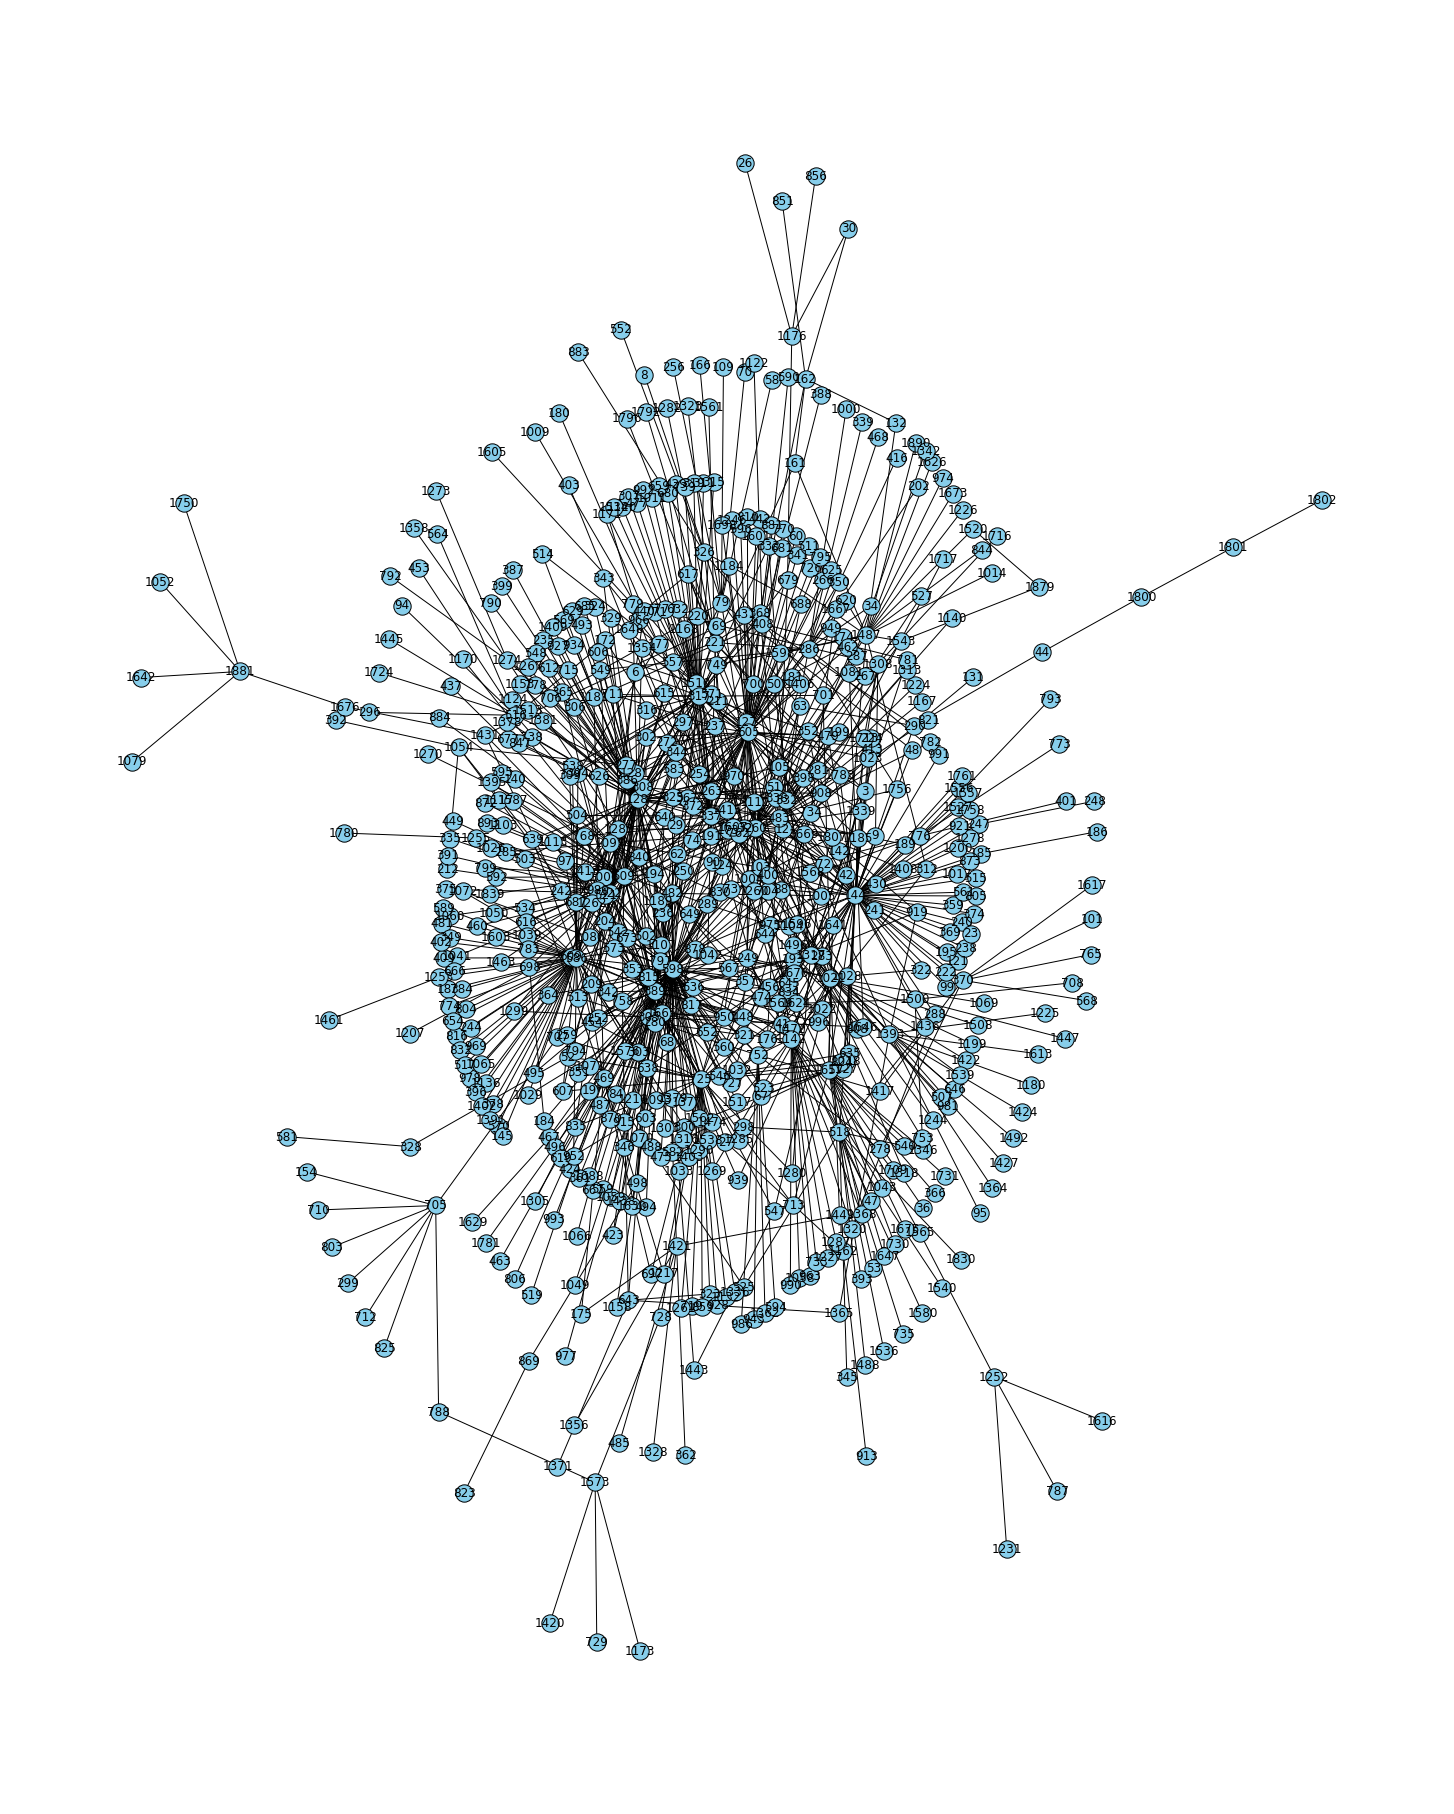

In [10]:
#plot
plt.figure(figsize=(20,25))
pos = nx.kamada_kawai_layout(G)
#pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
# Set title
# Set edge color
plt.gca().collections[0].set_edgecolor("#000000")

So, which employee has the most connections?

To measure centrality, we calculate the degrees or how many connections a node has

In [11]:
degree_centrality = nx.degree_centrality(G)

In [12]:
#degree centrality
Employee=[]
degree=[]
for node in G:
    Employee.append(node)
    degree.append(G.degree(node))

degree_dist_list = list (zip(Employee,degree))
degree_dist = pd.DataFrame(degree_dist_list, columns=['Employee','Degree'])

In [13]:
degree_dist

,Employee,Degree
0,79,11
1,48,2
2,63,4
3,58,1
4,70,1
...,...,...
659,1750,1
660,1052,1
661,1642,1
662,1079,1


Employee 79 has the most connections of 11

### Which departments are the most/least active?
We plot the network graph of department

In [14]:
#create graph
G1 = nx.from_pandas_edgelist(df,source='sender',target='department')

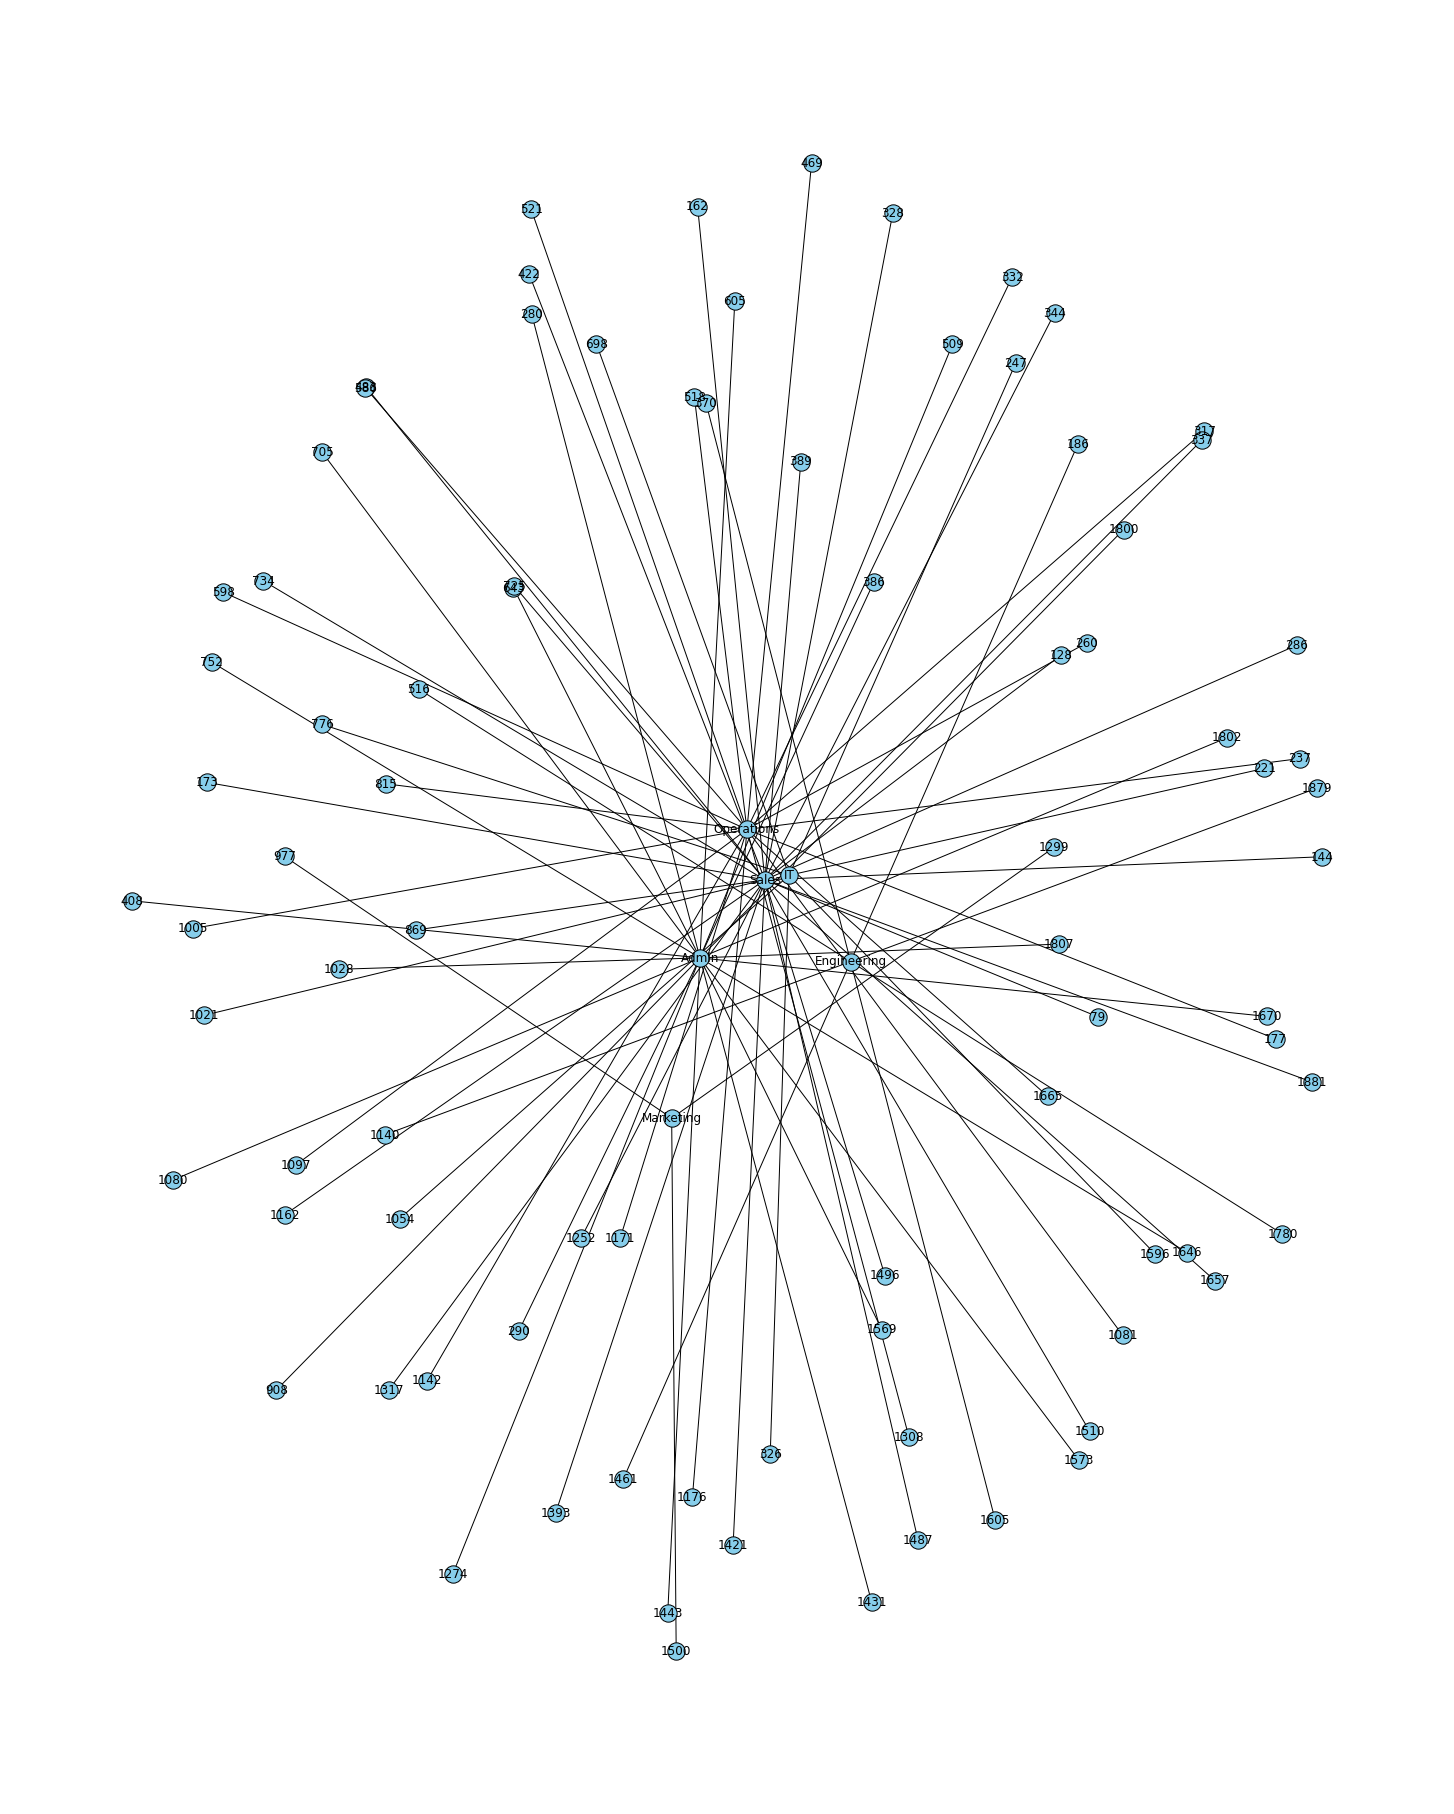

In [16]:
#plot
plt.figure(figsize=(20,25))
pos = nx.kamada_kawai_layout(G1)
#pos = nx.spring_layout(G)
nx.draw(G1, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
# Set title
# Set edge color
plt.gca().collections[0].set_edgecolor("#000000")

Which department is the most and least active?

In [17]:
#degree centrality
Department=[]
degree=[]
for node in G1:
    Department.append(node)
    degree.append(G1.degree(node))

degree_dist_list = list (zip(Department,degree))
degree_dist = pd.DataFrame(degree_dist_list, columns=['Department','Degree'])

In [18]:
degree_dist[:10]

,Department,Degree
0,79,1
1,Sales,26
2,144,1
3,177,1
4,Operations,19
5,186,1
6,Engineering,8
7,221,1
8,IT,7
9,237,1


Sales, Operations and Engineering appears to be the most active departments and Marketing seems to be the least active department.

### Identify the most influential departments and employees

In [19]:
Influential_employees=nx.centrality.betweenness_centrality(G).values()

(array([634.,  14.,   5.,   3.,   1.,   3.,   2.,   0.,   1.,   1.]),
 array([0.        , 0.01989088, 0.03978175, 0.05967263, 0.0795635 ,
        0.09945438, 0.11934525, 0.13923613, 0.159127  , 0.17901788,
        0.19890875]),
 <BarContainer object of 10 artists>)

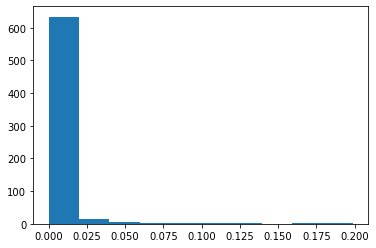

In [20]:
#closeness_centrality
plt.hist(nx.centrality.betweenness_centrality(G).values())

### Using the network analysis, in which departments would you recommend the HR team focus to boost collaboration?

The HR team should focus on esterblishing relationship between The Marketing department and other departments since no connection 
exists with other departments